# Using heron's verification interface

Heron includes a growing suite of tools for verifiying its models against other models and alternative waveform catalogues.
This notebook contains an overview of the process for comparing on of the models with the most up to date version of the Georgia Tech waveform catalogue.

In [1]:
import heron.testing

In [2]:
from elk.catalogue import NRCatalogue, PPCatalogue

In [3]:
from heron.models.georgebased import HeronHodlr

In [4]:
from heron.models.torchbased import HeronCUDA

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

First we need to load the model itself.

In [7]:
model = HeronCUDA()

We then load the NR catalogue.

In [8]:
data_root = "/home/daniel/data/gravitational-waves/gt-waveforms/"
samples_catalogue = NRCatalogue("GeorgiaTech", catalogue_root = data_root)

Matches between every waveform from the catalogue can then be calculated against the output of the model using the `nrcat_match` function from `heron.testing`.

In [12]:
matches = heron.testing.nrcat_match(model, samples_catalogue)

/home/daniel/repositories/elk/elk/waveform.py:224: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  waveform = h5py.File(self.data_file)
/home/daniel/.virtualenvs/gaston/sandbox/local/lib/python3.7/site-packages/pycbc/filter/matchedfilter.py:1249: RuntimeWarning: divide by zero encountered in double_scalars
  norm = (4.0 * stilde.delta_f) / sqrt( h_norm)
/home/daniel/.virtualenvs/gaston/sandbox/local/lib/python3.7/site-packages/pycbc/filter/matchedfilter.py:1364: RuntimeWarning: invalid value encountered in double_scalars
  return maxsnr * snr_norm / sqrt(v2_norm), max_id


findfont: Font family ["'URW Bookman L'"] not found. Falling back to DejaVu Sans.
findfont: Font family ["'URW Bookman L'"] not found. Falling back to DejaVu Sans.


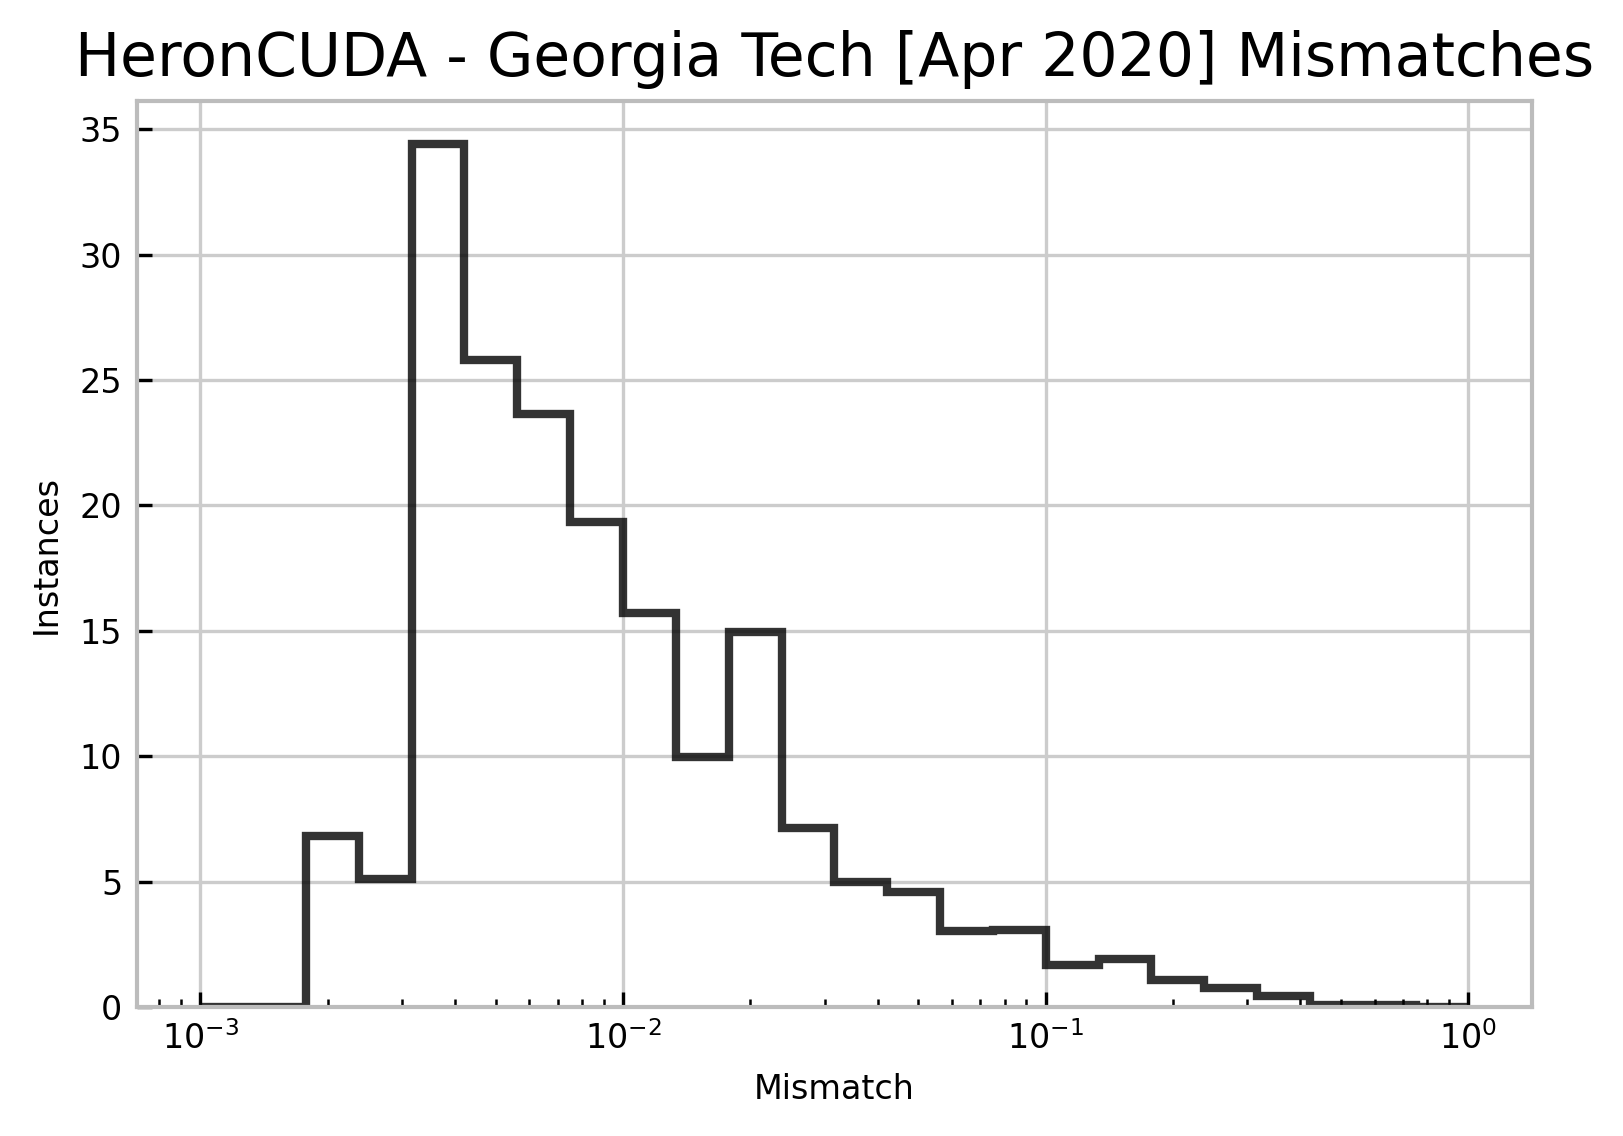

In [11]:
f, ax = plt.subplots(1,1, dpi=300)
ax.hist(1-np.array(list(matches.values())), alpha=0.8, density=True, 
        bins=np.logspace(-3,0,25), 
        histtype="step",
        color="black",
           lw=2
       );

ax.set_xscale("log")

ax.set_xlabel("Mismatch")
ax.set_ylabel("Instances")

ax.set_title("HeronCUDA - Georgia Tech [Apr 2020] Mismatches")

f.savefig("mistmatches-cuda.png")